In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Generate linear data

Want a distribution of (x,y) pairs that fall on a line

$y = 2x+b+z$

$z \sim N(0,\sigma^2)$

In [18]:
max_x = 10
num_points = 1000
b=1
x=max_x*np.random.rand(num_points)
z = np.random.randn(num_points)
y=2*x+b+z

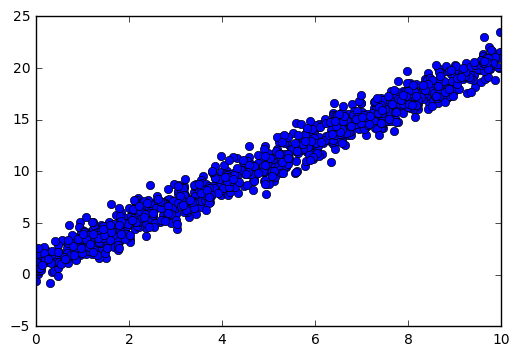

In [19]:
plt.plot(x,y,'o')

In [25]:
X = np.ndarray([num_points,2])
X[:,0] = x
X[:,1] = y

In [26]:
X.shape

(1000, 2)

# Laten space

In [36]:
z_size=10
def Z(batch_size,z_size=10):
    return np.random.uniform(-1.,1.,size=[batch_size,z_size])

# Miscellanous

In [21]:
batch_size = 10

# Linear discriminator

In [47]:
g = tf.Graph()
with g.as_default():
    data_input = tf.placeholder(tf.float32,shape=[batch_size,2])
    
    W = tf.Variable(tf.truncated_normal([2,1]))
    b = tf.Variable(tf.zeros([1]))
    d_vars = [W,b]
    def D(x,var_l):
        W,b = var_l[0],var_l[1]
        logit=tf.matmul(x,W)+b
        return logit

# Linear generator

In [48]:
with g.as_default():
    z_input = tf.placeholder(tf.float32,shape=[batch_size,z_size])
    
    W_g = tf.Variable(tf.truncated_normal([z_size,2]))
    b_g = tf.Variable(tf.zeros([2]))
    g_vars =[W_g,b_g]
    
    def G(z,var_l):
        W,b = var_l[0],var_l[1]
        g = tf.matmul(z,W)+b
        return g

# Train

In [49]:
with g.as_default():
    D_data = D(data_input,d_vars)
    G_z = G(z_input,g_vars)
    D_g = D(G_z,d_vars)
    
    loss_d =-tf.reduce_mean(tf.log(tf.sigmoid(D_data)) +tf.log(1- tf.sigmoid(D_g)))
    loss_g = tf.reduce_mean(tf.log(1- tf.sigmoid(D_g)))
    
    opt = tf.train.AdamOptimizer(learning_rate=.0002,beta1=.5)
    
    train_d = opt.minimize(loss_d,var_list=d_vars)
    train_g = opt.minimize(loss_g,var_list=g_vars)

# Other ops

In [50]:
with g.as_default():
    init = tf.initialize_all_variables()

# Train Session

In [51]:
sess = tf.Session(graph = g)
sess.run(init)

In [52]:
epoch_size = X.shape[0]/batch_size

In [53]:
num_epochs = 1
for _ in range(num_epochs):
    for s in range(epoch_size):
        fd = {data_input:X[s*batch_size:s*batch_size+batch_size,:],z_input:Z(batch_size,z_size)}
        sess.run([train_d],feed_dict=fd)
        sess.run([train_g],feed_dict=fd)

# Visualize